<IPython.core.display.Javascript object>


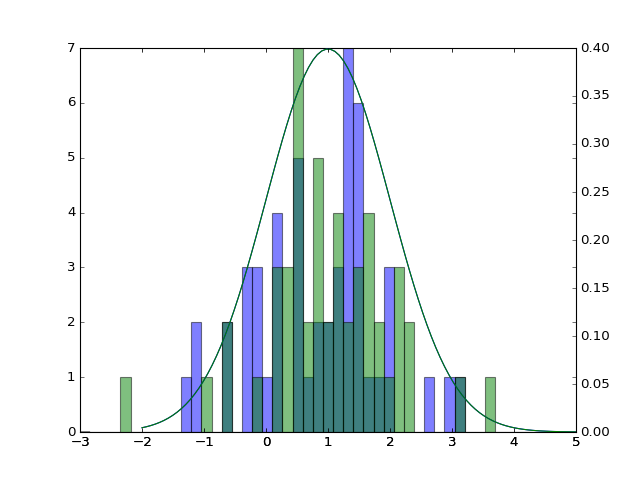

In [5]:
%matplotlib notebook
# null hypothesis: H0
# alternative hypothesis: H1
# can we reject H0?
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Let's look at two normal and "test" if they are the same
# create two distributions
num_samples = 50
# use normal to create random numbers with normal distribution
mu1,mu2=(1,1)
x1 = [np.random.normal(loc=mu1,scale=1) for _ in range(num_samples)]
x2 = [np.random.normal(loc=mu2,scale=1) for _ in range(num_samples)]

bins=np.linspace(-3,5,50)
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
_=plt.hist(x1, bins, alpha = 0.5, color='blue')    # alpha 0.5 makes color transparent
_=plt.hist(x2, bins, alpha = 0.5, color='green')

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
x_line = np.linspace(-2, 5,100)
ax2.yaxis.tick_right()
plt.plot(x_line, stats.norm.pdf(x_line,mu1,1),'b')
_=plt.plot(x_line, stats.norm.pdf(x_line,mu2,1),'g')

In [11]:
# Now we need to test the hypothesis (H0) that the means are the same
# i.e. H0: mu1 == mu2
# alpha = P(Type 1 error) - reject but it is true
# beta = P(type 2 error) - fail to reject when not true

alpha = 0.05    # 5% error that we  reject the hypothesis when its true
# function to do 2-sample T test, OR are x1, x2 the same
# A Z-test would be used if std1 == std2 and they are known
# A T-Test is used if std1 == std2 and they are unknown (but we use sample s)
(t_val,p_val)=stats.ttest_ind(x1, x2)
print("T = %.4f" %t_val)
print("T is the position on the t-distribution that alignts with the null hypothesis, that mu1=mu2")
print("P = %.4E" %p_val)
print("P is the 'smallest level of significance at which the null hypothesis is rejected'")
print("\nReject if P > 2*alpha (because we are two-sided here)")    #???
print("Hypothesis = %s" %(p_val > (2*alpha)))

'''
What are we doing here?
Basically taking the distribution of our testing hypothesis and seeing how much of it overlaps with the other distribution
'''

T = -0.0120
T is the position on the t-distribution that alignts with the null hypothesis, that mu1=mu2
P = 9.9042E-01
P is the 'smallest level of significance at which the null hypothesis is rejected'

Reject if P > 2*alpha (because we are two-sided here)
Hypothesis = True


In [14]:
#run 100 tests, maybe 5% do not pass if they are equal(?)
def hundredTests(x1):
    passFail = []
    iterations = 0    # just for troubleshooting
    for _ in range(100):
        x3 = [np.random.normal(loc=mu1,scale=1) for _ in range(num_samples)]
        (t_val,p_val)=stats.ttest_ind(x1, x3)
        if p_val > alpha:
            passFail.append(0)
        else:
            passFail.append(1)
        iterations += 1
    # return amount where we think the means are not the sam
    return sum(passFail)

print("Number that fail from 100 T tests:\t%f" %(hundredTests(x1)))

Number that fail from 100 T tests:	6.000000


In [17]:
print("Now let's run 100 tests 100 times and find the average")
sum_all = [hundredTests(x1) for _ in range(100)]
print("Average of 100 tests: %.1f fail during 100 tests" %(np.mean(sum_all)))
print("Is this close to the 5% of failures we expected by alpha?")

#two different distributions, normal and poisson

# Type 1 error: We say mu != 0.5 and the coin is rigged but in reality it is 0.5 and really random
# Type 2 error: We say mu = 0.5 but the coin is actually rigged

Now let's run 100 tests 100 times and find the average
Average of 100 tests: 5.7 fail during 100 tests


In [ ]:
# Eq 4-26 - figure out sample size needed!